<h1 align='center'>Pandas</h1>

**Pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.
Pandas provides high-performance, easy-to-use data structures and data analysis tools for the Python programming language. To get started with pandas, you will need to get comfortable with its two workhorse data structures: Series and DataFrame. 

## Series
Pandas Series is a one-dimensional array-like object that has index and value just like Numpy. Infact if you view the type of the `values` of series object, you will see that it indeed is `numpy.ndarray`.

You can assign name to pandas Series.


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
ob = pd.Series([8,7,6,5], name='test_data')
print 'Name: ',ob.name
print 'Data:\n',ob
print 'Type of Object: ',type(ob)
print 'Type of elements:',type(ob.values)

Name:  test_data
Data:
0    8
1    7
2    6
3    5
Name: test_data, dtype: int64
Type of Object:  <class 'pandas.core.series.Series'>
Type of elements: <type 'numpy.ndarray'>


You can also use your numpy array and convert them to Series.

In [3]:
ob = pd.Series(np.linspace(5, 8, num=4, dtype=int)[::-1]) # np.linspace(5,8,num=4,dtype=int) = Evenly spaced integers 
# between 5 to 8 (reversed)
print ob
print type(ob)

0    8
1    7
2    6
3    5
dtype: int64
<class 'pandas.core.series.Series'>


You can also provide custom index to the values and just like in Numpy, access them with the index.

In [4]:
ob = pd.Series([8,7,6,5], index=['a','b','c','d'])
print ob['b']

7


Pandas Series is more like an fixed size dictionary whose mapping of index-value is preserved when array operations are applied to them. For example,

In [5]:
print ob[(ob>4) & (ob<8)] # select all the values greater than 4 and less than 8
# or lets apply numpy's exp function to calculate exponential of all elements 
#print np.exp(ob)

b    7
c    6
d    5
dtype: int64


This also means that if you have a dictionary, you can easily convert that into pandas series.

In [6]:
states_dict = {'State1': 'Alabama', 'State2': 'California', 'State3': 'New Jersey', 'State4': 'New York'}
ob = pd.Series(states_dict)
print ob
print type(ob)

State1       Alabama
State2    California
State3    New Jersey
State4      New York
dtype: object
<class 'pandas.core.series.Series'>


Just like dictionaries, you can also change the index..

In [7]:
ob.index = ['AL','CA','NJ','NY']
print ob

AL       Alabama
CA    California
NJ    New Jersey
NY      New York
dtype: object


or use dictionary's method to get the label..

In [8]:
ob.get('CA', np.nan)

'California'

## Dataframe
Dataframe is something like spreadsheet or a sql table. It is basically a 2 dimensional labelled data structure with columns of potentially different datatype. Like Series, DataFrame accepts many different kinds of input:
* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* [`Structured or record ndarray`](http://docs.scipy.org/doc/numpy/user/basics.rec.html 'Structured or record ndarray')
* A Series
* Another DataFrame

Compared with other such DataFrame-like structures you may have used before (like `R’s` `data.frame`), row- oriented and column-oriented operations in DataFrame are treated roughly symmetrically. Under the hood, the data is stored as one or more two-dimensional blocks rather than a list, dict, or some other collection of one-dimensional arrays.


### Creating Dataframes from dictionaries

In [9]:
data = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [10]:
df = pd.DataFrame(data)
print 'Dataframe:\n',df
print 'Type of Object:',type(df)
print 'Type of elements:',type(df.values)

Dataframe:
   one  two
a    1    1
b    2    2
c    3    3
d  NaN    4
Type of Object: <class 'pandas.core.frame.DataFrame'>
Type of elements: <type 'numpy.ndarray'>


> Another way to construct dataframe from dictionaries is by using `DataFrame.from_dict` function. `DataFrame.from_dict` takes a dict of dicts or a dict of array-like sequences and returns a DataFrame. It operates like the DataFrame constructor except for the orient parameter which is 'columns' by default, but which can be set to 'index' in order to use the dict keys as row labels.

Just like Series, you can access index, values and also columns.

In [11]:
print 'Index: ',df.index
print 'Columns: ',df.columns
print 'Values of Column one: ',df['one'].values
print 'Values of Column two: ',df['two'].values

Index:  Index([u'a', u'b', u'c', u'd'], dtype='object')
Columns:  Index([u'one', u'two'], dtype='object')
Values of Column one:  [  1.   2.   3.  nan]
Values of Column two:  [ 1.  2.  3.  4.]


### Creating dataframe from list of dictionaries

As with Series, if you pass a column that isn’t contained in data, it will appear with NaN values in the result

In [12]:
df2 = pd.DataFrame([{'a': 1, 'b': 2, 'c':3, 'd':None}, {'a': 2, 'b': 2, 'c': 3, 'd': 4}],
                   index=['one', 'two'])
print 'Dataframe: \n',df2

# Ofcourse you can also transpose the result:

print '\nTransposed Dataframe: \n',df2.T

Dataframe: 
     a  b  c   d
one  1  2  3 NaN
two  2  2  3   4

Transposed Dataframe: 
   one  two
a    1    2
b    2    2
c    3    3
d  NaN    4


Assigning a column that doesn’t exist will create a new column. 

In [13]:
df['three'] = None
print 'Added third column: \n',df

# The del keyword will delete columns as with a dict:
del df['three']
print '\nDeleted third column: \n',df

Added third column: 
   one  two three
a    1    1  None
b    2    2  None
c    3    3  None
d  NaN    4  None

Deleted third column: 
   one  two
a    1    1
b    2    2
c    3    3
d  NaN    4


Each Index has a number of methods and properties for set logic and answering other common questions about the data it contains.


|Method | Description|
|:---|:---|
|`append` | Concatenate with additional Index objects, producing a new Index|
|`diff` | Compute set difference as an Index|
|`intersection` | Compute set intersection|
|`union` | Compute set union|
|`isin` | Compute boolean array indicating whether each value is contained in the passed collection|
|`delete` | Compute new Index with element at index i deleted|
|`drop` | Compute new index by deleting passed values|
|`insert` | Compute new Index by inserting element at index i|
|`is_monotonic` | Returns True if each element is greater than or equal to the previous element| 
|`is_unique` | Returns True if the Index has no duplicate values|
|`unique` | Compute the array of unique values in the Index|

for example:

In [14]:
print 1 in df.one.values
print 'one' in df.columns

True
True


## Reindexing
A critical method on pandas objects is reindex, which means to create a new object with the data conformed to a new index.

In [15]:
data = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(data)
print df

   one  two
a    1    1
b    2    2
c    3    3
d  NaN    4


In [16]:
print df.reindex(['d','c','b','a'])  # Reindex in descending order.

   one  two
d  NaN    4
c    3    3
b    2    2
a    1    1


If you `reindex` with more number of rows than in the dataframe, it will return the dataframe with new row whose values are `NaN`.

In [17]:
print df.reindex(['a','b','c','d','e'])

   one  two
a    1    1
b    2    2
c    3    3
d  NaN    4
e  NaN  NaN


Reindexing is also useful when you want to introduce any missing values. For example in our case, look at column `one` and row `d`

In [18]:
df.reindex(['a','b','c','d','e'], fill_value=0)
# Guess why the df['one']['d'] was not filled with 0 ?

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4
e,0,0


For ordered data like time series, it may be desirable to do some interpolation or filling of values when `reindex`ing. The method option allows us to do this, using a `method` such as `ffill` which forward fills the values:

In [19]:
df.reindex(['a','b','c','d','e'], method='ffill')

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4
e,NaN,4


There are basically two different types of method (interpolation) options:

|Method | Description|
|:---|:---|
|`ffill` or `pad` | Fill (or carry) values forward |
|`bfill` or `backfill` | Fill (or carry) values backward|

Reindexing has following arguments:

|Argument | Description|
|:---|:---|
|`index` | New sequence to use as index. Can be Index instance or any other sequence-like Python data structure. An Index will be used exactly as is without any copying|
|`method` | Interpolation (fill) method, see above table for options.|
|`fill_value` | Substitute value to use when introducing missing data by reindexing.|
|`limit` | When forward- or backfilling, maximum size gap to fill|
|`level` | Match simple Index on level of MultiIndex, otherwise select subset of|
|`copy` | Do not copy underlying data if new index is equivalent to old index. True by default (i.e. always copy data)|

## Dropping Entries
Dropping one or more entries from an axis is easy if you have an index array or list without those entries.

In [20]:
# Drop row c and row a
df.drop(['c', 'a'])

,one,two
b,2,2
d,NaN,4


In [21]:
# Drop column two
df.drop(['two'], axis=1)

,one
a,1
b,2
c,3
d,NaN


## Indexing, selection, Sorting and filtering
Series indexing works analogously to NumPy array indexing, except you can use the Series’s index values instead of only integers.

In [22]:
print df
# Slicing and selecting only row 0 and row 4
df['one'][['a', 'd']]

   one  two
a    1    1
b    2    2
c    3    3
d  NaN    4


a     1
d   NaN
Name: one, dtype: float64

In [23]:
# Slicing df from row b to row 4
df['one']['b':'d']

b     2
c     3
d   NaN
Name: one, dtype: float64

If you observe the above command (and the one above it), you will see that slicing with labels behaves differently than normal Python slicing in that the endpoint is inclusive.

For DataFrame label-indexing on the rows, there is a special indexing field `ix`. It enables you to select a subset of the rows and columns from a DataFrame with NumPy- like notation plus axis labels. It is a less verbose way to do the reindexing.

In [24]:
df.ix[['a','c'],['one']]

,one
a,1
c,3


In [25]:
df.ix[df.one > 1]

,one,two
b,2,2
c,3,3


There are many ways to select and rearrange the data contained in a pandas object. Some indexing options can be seen in below table:

|Indexing Type| Description|
|:---|:---|
|df[val] | Select single column or sequence of columns from the DataFrame. Special case con- veniences: boolean array (filter rows), slice (slice rows), or boolean DataFrame (set values based on some criterion).|
|df.ix[val] | Selects single row of subset of rows from the DataFrame.|
|df.ix[:, val] | Selects single column of subset of columns.|
|df.ix[val1, val2] | Select both rows and columns.|
|reindex method | Conform one or more axes to new indexes.|
|xs method | Select single row or column as a Series by label.|
|icol, irowmethods | Select single column or row, respectively, as a Series by integer location.|
|get_value, set_value methods | Select single value by row and column label.|

You can sort a data frame or series (by some criteria) using the built-in functions. To sort lexicographically by row or column index, use the sort_index method, which returns a new, sorted object:

In [26]:
dt = pd.Series(np.random.randint(3, 10, size=7), index=['g','c','a','b','e','d','f'])
print 'Original Data: \n', dt
print 'Sorted by Index: \n',dt.sort_index()

Original Data: 
g    6
c    9
a    9
b    5
e    3
d    8
f    7
dtype: int64
Sorted by Index: 
a    9
b    5
c    9
d    8
e    3
f    7
g    6
dtype: int64


## Data alignment and arithmetic
Data alignment between DataFrame objects automatically align on both the columns and the index (row labels). The resulting object will have the union of the column and row labels.

In [27]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
print 'df1:\n',df1
print 'df2:\n',df2
print 'Sum:\n',df1.add(df2)

df1:
          A         B         C         D
0 -1.869235  0.114255  0.816411 -0.297434
1  0.112815  0.660802  1.037941  0.576426
2  1.041494 -0.078062 -0.972924 -0.568679
3 -2.785414  1.578352  0.924656  0.226743
4 -0.429171  0.321302  0.183773  0.850985
5 -0.536632  0.500795  1.429295 -1.099967
6  0.592204  0.392437  0.174914 -0.009833
7  0.425151  0.453137 -1.347765  1.300194
8  0.081314 -0.324954  0.347301  1.892119
9  1.738767  1.396856  0.326706 -0.741861
df2:
          A         B         C
0 -0.074048  0.530960 -1.013815
1  0.709423 -0.953860 -0.270428
2  0.215185  1.276945 -1.479264
3 -1.376585 -0.417693  0.039363
4  0.305415  0.403303  1.495533
5  1.983297 -0.363862  1.657616
6  0.673487  1.211236 -0.347881
Sum:
          A         B         C   D
0 -1.943283  0.645215 -0.197403 NaN
1  0.822238 -0.293058  0.767512 NaN
2  1.256679  1.198883 -2.452188 NaN
3 -4.161999  1.160658  0.964019 NaN
4 -0.123756  0.724605  1.679306 NaN
5  1.446665  0.136932  3.086912 NaN
6  1.265692  1.

Note that in arithmetic operations between differently-indexed objects, you might want to fill with a special value, like 0, when an axis label is found in one object but not the other:

In [28]:
print 'Sum:\n',df1.add(df2, fill_value=0)

Sum:
          A         B         C         D
0 -1.943283  0.645215 -0.197403 -0.297434
1  0.822238 -0.293058  0.767512  0.576426
2  1.256679  1.198883 -2.452188 -0.568679
3 -4.161999  1.160658  0.964019  0.226743
4 -0.123756  0.724605  1.679306  0.850985
5  1.446665  0.136932  3.086912 -1.099967
6  1.265692  1.603673 -0.172967 -0.009833
7  0.425151  0.453137 -1.347765  1.300194
8  0.081314 -0.324954  0.347301  1.892119
9  1.738767  1.396856  0.326706 -0.741861


Similarly you can perform subtracion, multiplication and division. 

When doing an operation between DataFrame and Series, the default behavior is to align the Series index on the DataFrame columns, thus broadcasting (just like in numpy) row-wise.

In [29]:
print df1.loc[0]
print 'Sum: \n',df1.sub(df1.loc[0])

A   -1.869235
B    0.114255
C    0.816411
D   -0.297434
Name: 0, dtype: float64
Sum: 
          A         B         C         D
0  0.000000  0.000000  0.000000  0.000000
1  1.982050  0.546547  0.221530  0.873859
2  2.910729 -0.192316 -1.789335 -0.271245
3 -0.916179  1.464097  0.108245  0.524177
4  1.440064  0.207047 -0.632639  1.148418
5  1.332603  0.386540  0.612884 -0.802533
6  2.461440  0.278182 -0.641497  0.287601
7  2.294386  0.338882 -2.164176  1.597627
8  1.950549 -0.439209 -0.469110  2.189553
9  3.608003  1.282602 -0.489706 -0.444427


In the special case of working with time series data, and the DataFrame index also contains dates, the broadcasting will be column-wise:

In [30]:
ind1 = pd.date_range('08/1/2015', periods=10)
df1.set_index(ind1)

,A,B,C,D
2015-08-01,-1.869235,0.114255,0.816411,-0.297434
2015-08-02,0.112815,0.660802,1.037941,0.576426
2015-08-03,1.041494,-0.078062,-0.972924,-0.568679
2015-08-04,-2.785414,1.578352,0.924656,0.226743
2015-08-05,-0.429171,0.321302,0.183773,0.850985
2015-08-06,-0.536632,0.500795,1.429295,-1.099967
2015-08-07,0.592204,0.392437,0.174914,-0.009833
2015-08-08,0.425151,0.453137,-1.347765,1.300194
2015-08-09,0.081314,-0.324954,0.347301,1.892119
2015-08-10,1.738767,1.396856,0.326706,-0.741861


## Using Numpy functions on DataFrame
Elementwise NumPy `ufuncs` like `log`, `exp`, `sqrt`, ... and various other NumPy functions can be used on DataFrame

In [31]:
np.abs(df1)

,A,B,C,D
0,1.869235,0.114255,0.816411,0.297434
1,0.112815,0.660802,1.037941,0.576426
2,1.041494,0.078062,0.972924,0.568679
3,2.785414,1.578352,0.924656,0.226743
4,0.429171,0.321302,0.183773,0.850985
5,0.536632,0.500795,1.429295,1.099967
6,0.592204,0.392437,0.174914,0.009833
7,0.425151,0.453137,1.347765,1.300194
8,0.081314,0.324954,0.347301,1.892119
9,1.738767,1.396856,0.326706,0.741861


In [32]:
np.asarray(df1)  # Convert input to numpy array

array([[-1.86923522,  0.11425481,  0.81641128, -0.29743373],
       [ 0.11281503,  0.66080205,  1.03794085,  0.57642562],
       [ 1.04149359, -0.07806151, -0.97292403, -0.56867919],
       [-2.78541399,  1.57835165,  0.92465601,  0.22674327],
       [-0.4291715 ,  0.32130162,  0.18377266,  0.8509845 ],
       [-0.53663223,  0.5007948 ,  1.42929534, -1.09996685],
       [ 0.59220433,  0.39243689,  0.17491424, -0.00983318],
       [ 0.42515075,  0.4531367 , -1.34776521,  1.30019367],
       [ 0.08131366, -0.32495414,  0.34730131,  1.89211945],
       [ 1.73876733,  1.39685642,  0.32670562, -0.74186091]])

Another frequent operation is applying a function on 1D arrays to each column or row. DataFrame’s apply method does exactly this:

In [33]:
def fn(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])  # Get max and min of the columns

#fn = lambda x: x - x.min()  # Subtract the minimum of the column from each element of that column
df1.apply(fn)

,A,B,C,D
min,-2.785414,-0.324954,-1.347765,-1.099967
max,1.738767,1.578352,1.429295,1.892119


Element-wise Python functions can be used, too. Suppose you wanted to format the dataframe elements in floating point format with accuracy of only 3 decimal places. You can do this with applymap:

In [34]:
fmt = lambda x: "{:.3f}".format(x)
df1.applymap(fmt)

,A,B,C,D
0,-1.869,0.114,0.816,-0.297
1,0.113,0.661,1.038,0.576
2,1.041,-0.078,-0.973,-0.569
3,-2.785,1.578,0.925,0.227
4,-0.429,0.321,0.184,0.851
5,-0.537,0.501,1.429,-1.100
6,0.592,0.392,0.175,-0.010
7,0.425,0.453,-1.348,1.300
8,0.081,-0.325,0.347,1.892
9,1.739,1.397,0.327,-0.742


> The reason for the name `applymap` is that Series has a `map` method for applying an element-wise function

## Loading Data
You can read data from a CSV file using the read_csv function. By default, it assumes that the fields are comma-separated.
Pandas supports following file formats:

|Function| Description|
|:---|:---|
|read_csv | Load delimited data from a file, URL, or file-like object. Use comma as default delimiter|
|read_table | Load delimited data from a file, URL, or file-like object. Use tab ('\t') as default delimiter|
|read_fwf | Read data in fixed-width column format (that is, no delimiters)|
|read_clipboard | Version of read_table that reads data from the clipboard. Useful for converting tables from web pages.|


Let's try loading some citibike data that you used for your challenge \#2 using pandas. (We will also use the same technique later on for loading big file like the one you had to use for Core Challenge). If you do not have the csv file from Challenge \#2, you can download it again from here: [`Dec-2week-2014.csv`](http://sharmamohit.com/misc_files/dec-2week-2014.csv 'dec-2week-2014')


In [35]:
dec = pd.read_csv('dec-2week-2014.csv')
dec.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,192260.000000,192260.000000,192260.000000,192260.000000,192260.000000,192260.000000,192260.000000,192260.000000,187314.000000,192260.000000
mean,746.854666,436.637116,40.735708,-73.990421,437.083829,40.735578,-73.990647,18141.270124,1975.495451,1.169874
std,2997.200035,318.126922,0.018599,0.011611,321.761738,0.018638,0.011726,2061.113390,11.737892,0.439104
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000
25%,348.000000,307.000000,40.724055,-73.998393,307.000000,40.723627,-73.999061,16387.000000,1967.000000,1.000000
50%,529.000000,417.000000,40.737262,-73.990617,414.000000,40.737050,-73.990741,18135.000000,1977.000000,1.000000
75%,816.000000,491.000000,40.750380,-73.981948,490.000000,40.750200,-73.981948,19911.000000,1985.000000,1.000000
max,732149.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1998.000000,2.000000


As we can see, the `describe()` method produces some very useful statistics about the csv data that we loaded. 

The parser functions have many additional arguments to help you handle the wide variety of exception file formats that occur 

|Argument|Description|
|:---|:---|
|`path` | String indicating filesystem location, URL, or file-like object|
|`sep` or `delimiter` | Character sequence or regular expression to use to split fields in each row|
|`header` | Row number to use as column names. Defaults to 0 (first row), but should be None if there is no header row|
|`index_col`| Column numbers or names to use as the row index in the result. Can be a single name/number or a list of them for a hierarchical index|
|`names`| List of column names for result, combine with header=None|
|`skiprows`| Number of rows at beginning of file to ignore or list of row numbers (starting from 0) to skip 
|`na_values`| Sequence of values to replace with NA|
|`comment`| Character or characters to split comments off the end of lines|
|`parse_dates`| Attempt to parse data to datetime; False by default. If True, will attempt to parse all columns. Otherwise can specify a list of column numbers or name to parse. If element of list is tuple or list, will combine multiple columns together and parse to date (for example if date/time split across two columns)|
|`keep_date_col`| If joining columns to parse date, drop the joined columns. Default True|
|`converters`| Dict containing column number of name mapping to functions. For example {'foo': f} would apply the function f to all values in the 'foo' column|
|`dayfirst`| When parsing potentially ambiguous dates, treat as international format (e.g. 7/6/2012 -> June 7, 2012). Default False|
|`date_parser`| Function to use to parse dates|
|`nrows`| Number of rows to read from beginning of file|
|`iterator`| Return a TextParser object for reading file piecemeal|
|`chunksize`| For iteration, size of file chunks|
|`skip_footer`| Number of lines to ignore at end of file|
|`verbose`| Print various parser output information, like the number of missing values placed in non-numeric columns|
|`encoding`| Text encoding for unicode. For example 'utf-8' for UTF-8 encoded text|
|`squeeze`| If the parsed data only contains one column return a Series|
|`thousands`| Separator for thousands, e.g. ',' or '.'|

> ** If you have a file that is comparatively huge in size and you see that pandas or numpy(genfromtxt or loadfromtxt) is struggling to load it then pandas provide an iterator that can be used. The arguments with `pd.read_csv()` would be something like (along with any other arguments as required):**
```
data_iter = pd.read_csv(infile, iterator=True, chunksize=1000, )  # This returns iterator with chunk of 1000 rows.
data = pd.concat(data_iter)
```

In [36]:
dec[:3]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1257,12/1/2014 00:00:28,12/1/2014 00:21:25,475,E 16 St & Irving Pl,40.735243,-73.987586,521,8 Ave & W 31 St,40.750450,-73.994811,16047,Customer,NaN,0
1,275,12/1/2014 00:00:43,12/1/2014 00:05:18,498,Broadway & W 32 St,40.748549,-73.988084,546,E 30 St & Park Ave S,40.744449,-73.983035,18472,Subscriber,1988,2
2,450,12/1/2014 00:01:22,12/1/2014 00:08:52,444,Broadway & W 24 St,40.742354,-73.989151,434,9 Ave & W 18 St,40.743174,-74.003664,19589,Subscriber,1983,1


In [37]:
type(dec['starttime'].values[0])

str

From above example, we can see that the `starttime` column is parsed as a string. We need to parse the dates as a datetime object so we can perform some datetime related computation. 

Pandas provide an excellent and easy way to parse the column with date and/or time as a datetime object. To do that, you simply need to proide the read_csv function with `parse_dates` with column name that has date (and/or time).

In [38]:
dec = pd.read_csv('dec-2week-2014.csv', parse_dates=['starttime'])
type(dec['starttime'].values[0])

numpy.datetime64

The above option works perfectly fine and as we can see the `starttime` column now has `numpy.datetime64` objects. You have to provide `parse_date` with the column that has the date (and/or time) information. This uses Pandas `dateutil.parser.parser` to do the conversion. 

Pandas will try to call `date_parser` in three different ways, advancing to the next if an exception occurs: 

1. Pass one or more arrays (as defined by `parse_dates`) as arguments.

2. Concatenate (row-wise) the string values from the columns defined by parse_dates into a single array and pass that; 

3. Call `date_parser` once for each row using one or more strings (corresponding to the columns defined by `parse_dates`) as arguments.

Now this works fine but it consumes (comparatively) quite a lot of time. If you know the format of your date and is consistent then you can create a function to do the conversion and pass it to `date_parser`. `date_parser` will basically pass every element of the column specified in `parse_dates` to the function and let your function manually convert it to `datetime` object. This reduces the computation time.  (This is a good time to check it for yourself. use the ipython's magic function `%timeit`)

> Once you start parsing huge files for dates, you might have to write your own cython functions. Do not worry about cython for now. But for the curious heads, check how to improve performance of pandas.. [`http://pandas.pydata.org/pandas-docs/stable/enhancingperf.html`](http://pandas.pydata.org/pandas-docs/stable/enhancingperf.html 'Enhancing Performance of Pandas')

In [39]:
from datetime import datetime
from matplotlib import dates
dt_parse = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M:%S')
dec = pd.read_csv('dec-2week-2014.csv', parse_dates=['starttime'], date_parser=dt_parse, index_col='starttime')

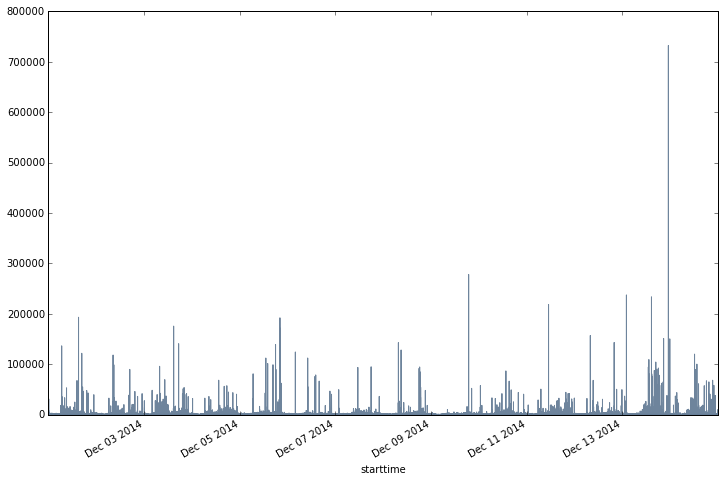

In [40]:
ax = dec['tripduration'].plot(kind='area', stacked=False, figsize=(12, 8), color='#3F5D7D')

> In the above example, I have also used the `starttime` as my index column. Also `plot()` function returns `matplotlib.axes._subplots.AxesSubplot` so you can play around with the plot before showing it. Refer to our `matplotlib` notes to use some ways to plot it better.

>> A quick example:
```
dt = pd.date_range(start=dec.index[0], end=dec.index[-1], freq='D')
ax = dec['tripduration'].plot(kind='area', stacked=False, figsize=(12, 8), xticks=dt)
ax.xaxis.set_minor_locator(dates.HourLocator(interval=12))
ax.xaxis.grid(True, which="major", linestyle='--')
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid(True, which="major")
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %d'))
```

Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.

In [41]:
dec[['start station id', 'end station id']][:5]

,start station id,end station id
starttime,,
2014-12-01 00:00:28,475,521
2014-12-01 00:00:43,498,546
2014-12-01 00:01:22,444,434
2014-12-01 00:02:17,475,521
2014-12-01 00:02:21,519,527


Another very common question that can be asked is.. just of curiosity, which bike was used the most in these 15days.. and the answer is.. 

In [42]:
dec['bikeid'].value_counts()[:5]  # Top 5 bikes by id

18440    118
19977    115
19846    110
19757    108
19494    105
dtype: int64

Also, just for fun, lets plot this!

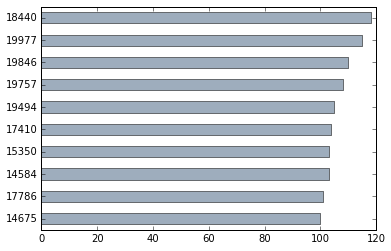

In [43]:
famous_bikes = dec['bikeid'].value_counts()
famous_bikes[:10][::-1].plot(kind='barh', alpha=0.5, color='#3F5D7D')

------------

------------
<h1 align='center'> End Note </h1>

Remember, this is just the tip of the iceberg of what functions Pandas provide. Pandas combined with Numpy and Matplotlib gives you an ultimate tool for almost all your Data Analysis needs. 

> Because of the high majority of the votes to not introduce Pandas, I have created this concise version of otherwise what would have been a 3 part course. 

**It is highly recommended to check out some tutorials below for more information on Pandas:**

[`Pandas own 10 minute to Pandas`](http://pandas.pydata.org/pandas-docs/stable/10min.html#min '10 minutes to pandas')

[`Hernan Rojas's Learn Pandas`](https://bitbucket.org/hrojas/learn-pandas 'hrojas's Learn Pandas')

[`Pandas Cookbook`](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook 'Pandas Cookbook')

[`Brandon Rhodes's Exercise and Solutions`](https://github.com/brandon-rhodes/pycon-pandas-tutorial 'Brandon Rhodes Exercise and Solutions')

[`Greg Reda's Blog`](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/ 'Greg Redas blog on Pandas')


**You can also find many PyCon talks:**

*PyCon 2015:*

[`Brandon Rhodes's Pandas from Ground up`](https://www.youtube.com/watch?v=5JnMutdy6Fw 'Pandas from Ground Up')

**PyVideo Videos**:

[`Some Videos from pyvideo.org on Pandas`](http://pyvideo.org/search?q=pandas 'PyVideo Pandas')
